0.12944693572496263


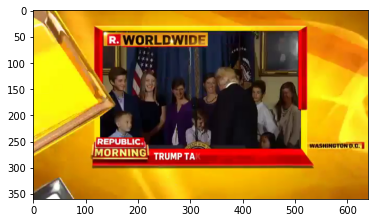

0.014457340663815923


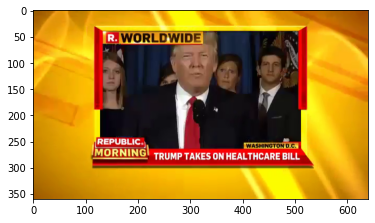

0.16997518610421836


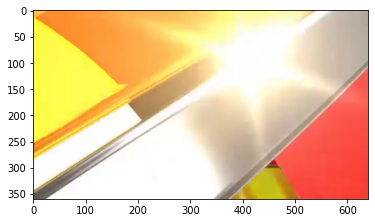

0.10899227354923557


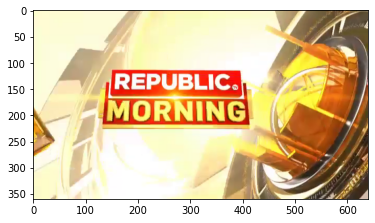

0.20014295925661185


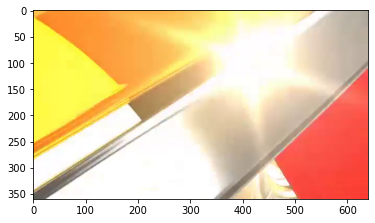

0.0643236074270557


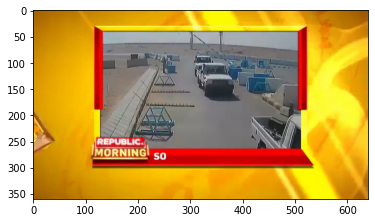

0.03437185929648241


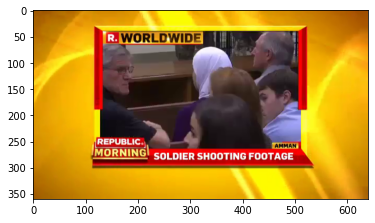

0.0625


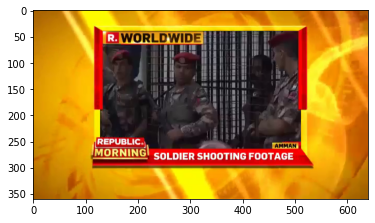

0.29083390764989664


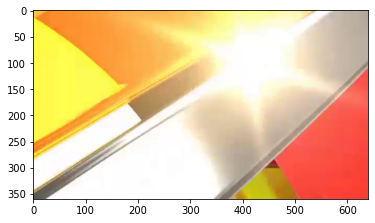

0.10425633668101388


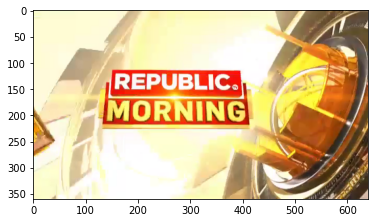

0.17468354430379746


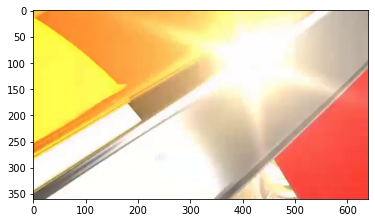

0.09238665526090675


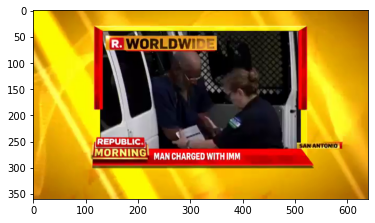

0.029955947136563875


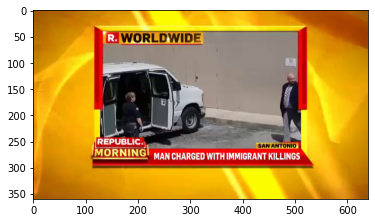

0.27887139107611547


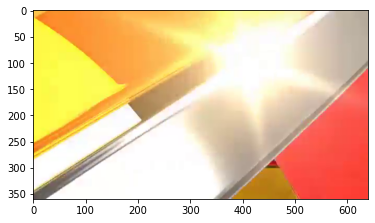

0.11900532859680284


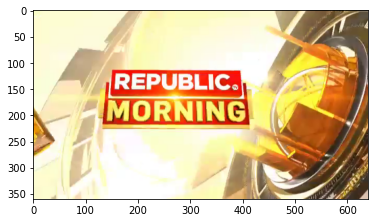

0.24729241877256317


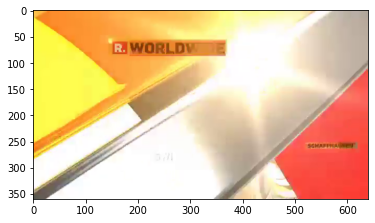

0.27426998929827245


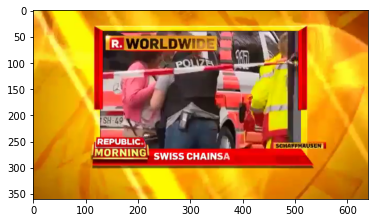

0.5652173913043478


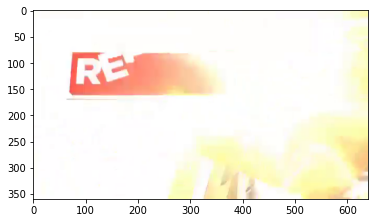

0.21753097751262046


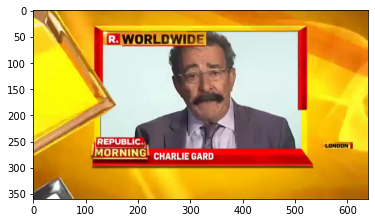

0.04001063405556294


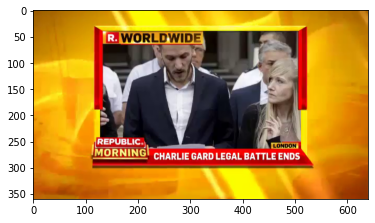

0.013722730471498945


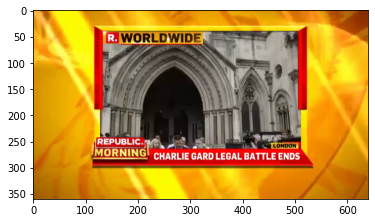

0.04123134328358209


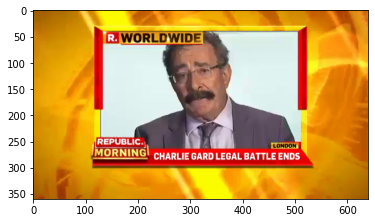

0.005949547834364588


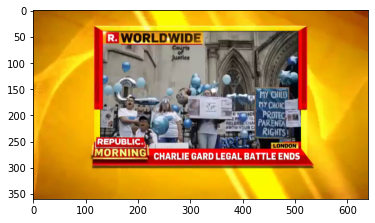

0.005012191817935519


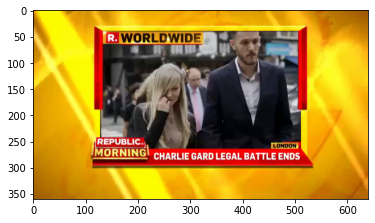

0.05358701344039099


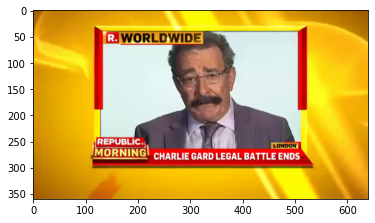

0.24523339907955294


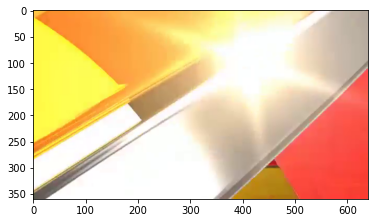

0.09681003015394382


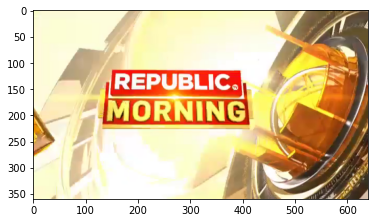

0.17707618393960192


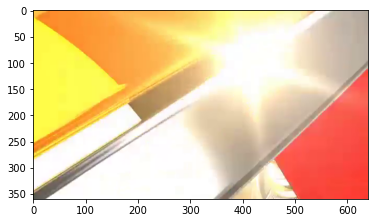

0.016637478108581436


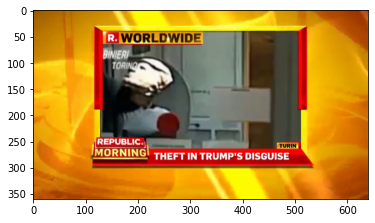

0.16549789621318373


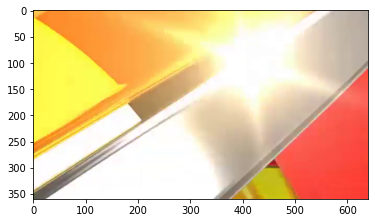

0.09083522911927201


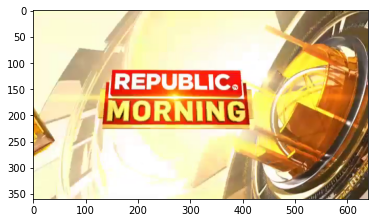

0.2188449848024316


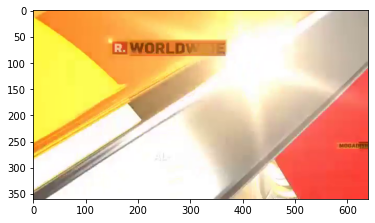

0.3238191462490528


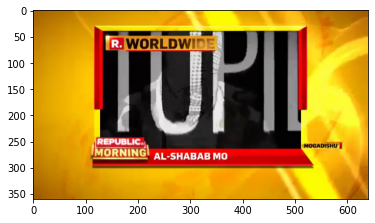

0.0


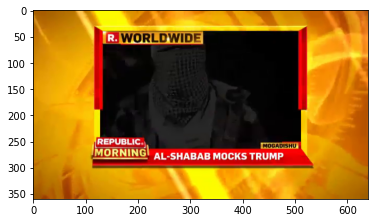

0.040242319342276074


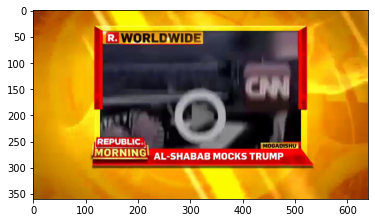

0.02241215574548908


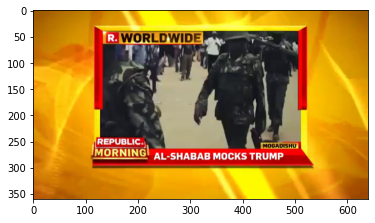

0.05513383939272873


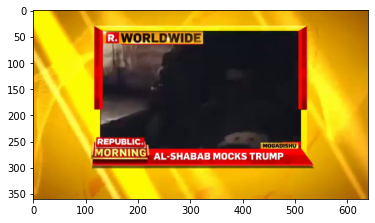

0.008795504519912045


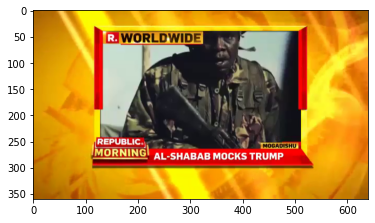

0.11328388401888065


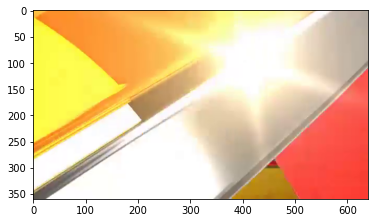

0.099983308295777


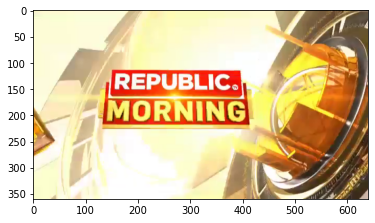

0.06536778201327122


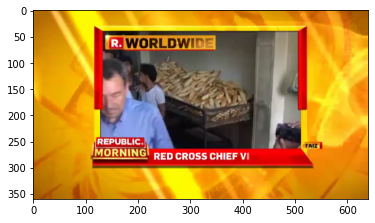

0.060970948012232414


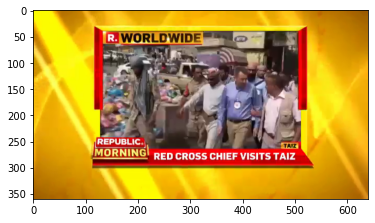

0.12774493243243243


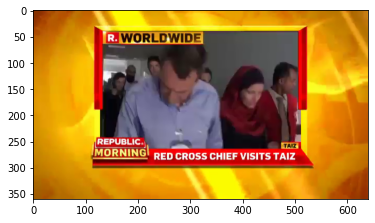

0.04998462011688711


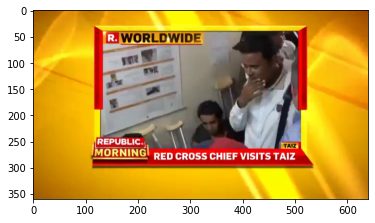

0.0944468736335811


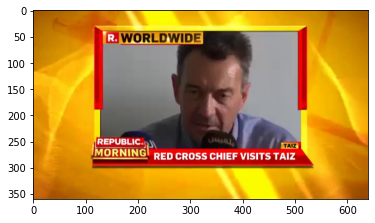

0.24086161879895562


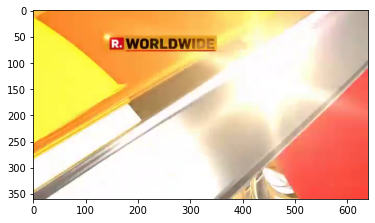

0.10836853220696938


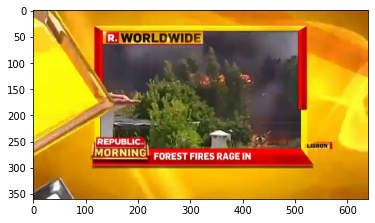

0.0867570385818561


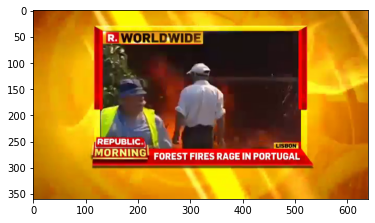

0.04150352388410337


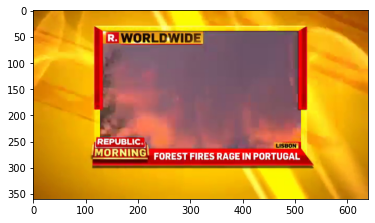

0.09282567652611705


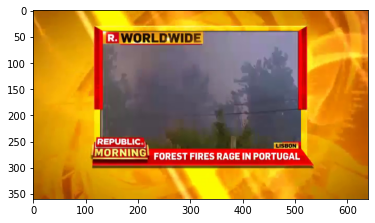

0.07871939736346516


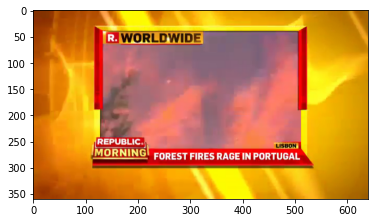

0.1277258566978193


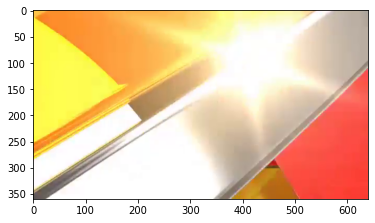

0.09544112823876681


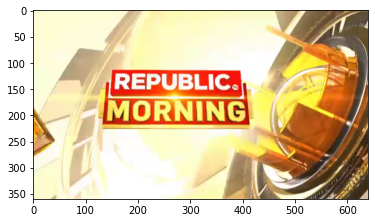

0.24348958333333334


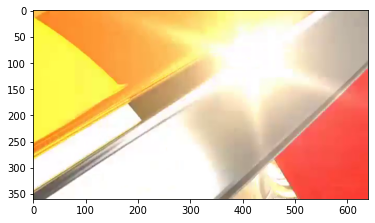

0.11937884179877062


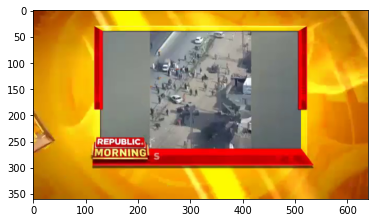

0.04417925606195252


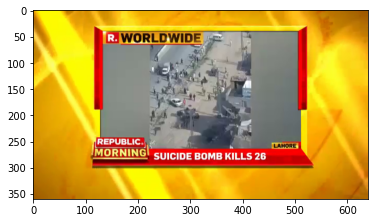

0.21357409713574096


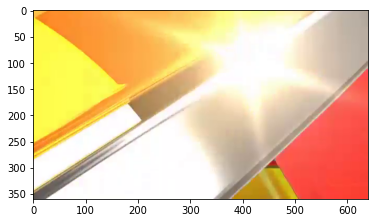

0.07968519429414658


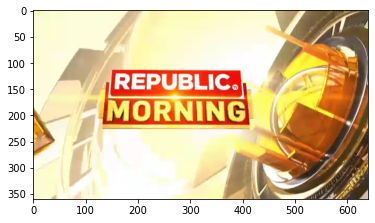

0.0694300518134715


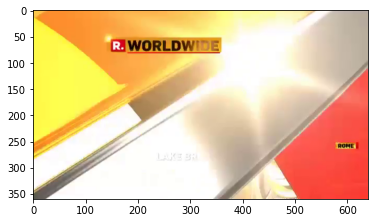

0.11320754716981132


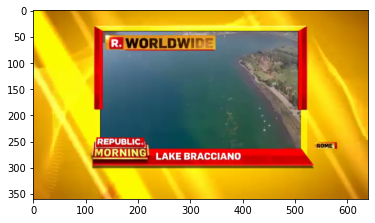

0.08335906143871566


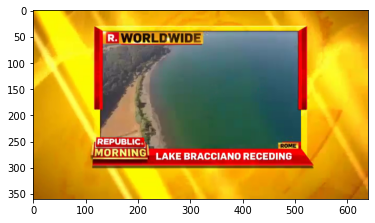

0.05245798649285378


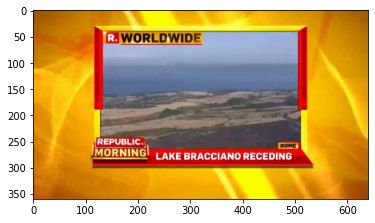

0.01875962480750385


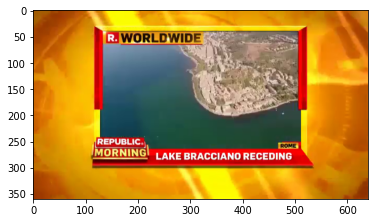

0.06042138255267282


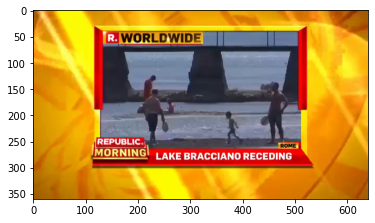

0.06828302820385948


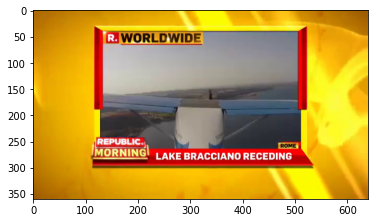

0.04643962848297214


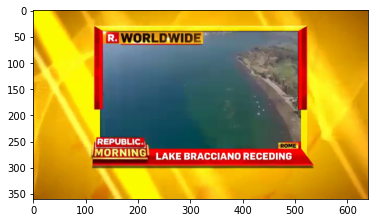

0.06674473067915691


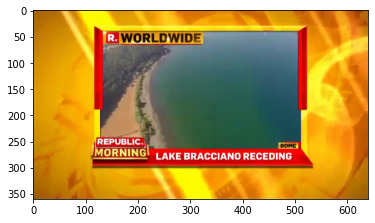

0.061948349133703826


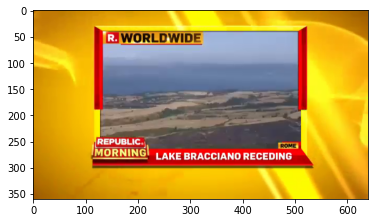

0.18197573656845753


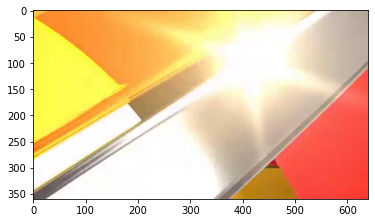

0.09479674796747968


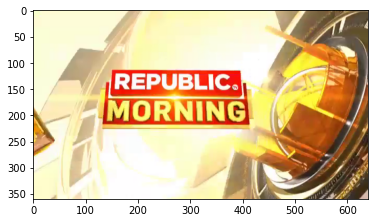

0.18364779874213835


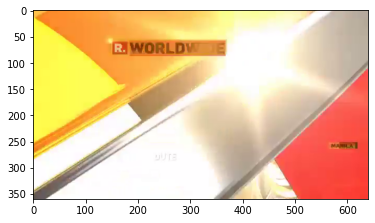

0.06051022559561459


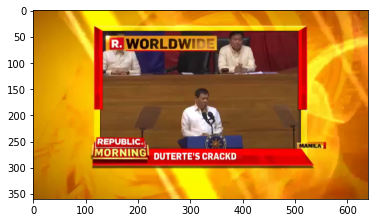

0.03788501026694045


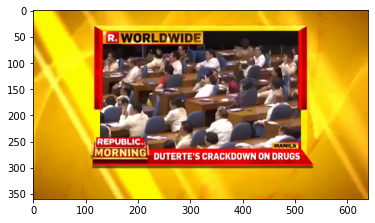

0.006926121372031662


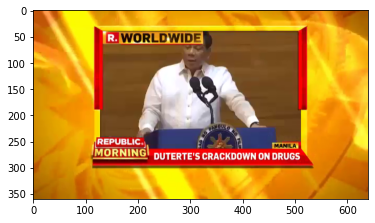

0.012328985046134267


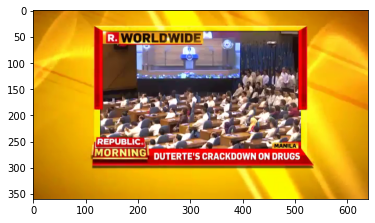

0.020646178092986602


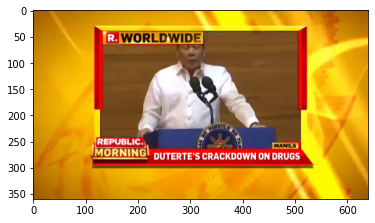

0.01275141317207835


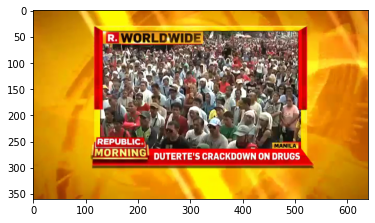

0.07982969664715274


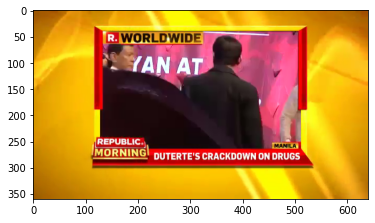

0.03433819125573967


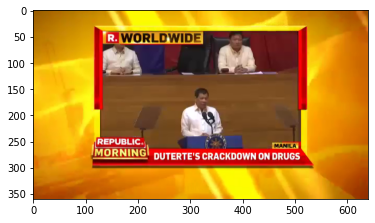

In [ ]:
import sys
import cv2
import numpy as np

# returns the edge-change-ratio
# The crop parameter can help you to reduce noises (e.g. subtitiles),
# the dilate_rate parameter controls the distance of the pixels between the frame
# and prev_frame

def ECR(frame, prev_frame, width, height, crop=True, dilate_rate = 5):
    safe_div = lambda x,y: 0 if y == 0 else x / y
    if crop:
        startY = int(height * 0.3)
        endY = int(height * 0.8)
        startX = int(width * 0.3)
        endX = int(width * 0.8)
        frame = frame[startY:endY, startX:endX]
        prev_frame = prev_frame[startY:endY, startX:endX]

    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray_image, 0, 200)
    dilated = cv2.dilate(edge, np.ones((dilate_rate, dilate_rate)))
    inverted = (255 - dilated)
    gray_image2 = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    edge2 = cv2.Canny(gray_image2, 0, 200)
    dilated2 = cv2.dilate(edge2, np.ones((dilate_rate, dilate_rate)))
    inverted2 = (255 - dilated2)
    log_and1 = (edge2 & inverted)
    log_and2 = (edge & inverted2)
    pixels_sum_new = np.sum(edge)
    pixels_sum_old = np.sum(edge2)
    out_pixels = np.sum(log_and1)
    in_pixels = np.sum(log_and2)
    return max(safe_div(float(in_pixels),float(pixels_sum_new)), safe_div(float(out_pixels),float(pixels_sum_old)))


if __name__ == "__main__":
    video = cv2.VideoCapture(input_video_path)
    width  = video.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
    height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
    # or
    # width  = video.get(3)  # float `width`
    # height = video.get(4)  # float `height`

    video.set(3, width)
    video.set(4, height)
    prev_frame = None
    prev=0
    while True:
        ret, frame = video.read()
        if frame is None:

            break
        if prev_frame is not None:
            
            if (prev-ECR(frame, prev_frame,width, height))>0.40:
              print(ECR(frame, prev_frame, width, height))
               # load image using cv2....and do processing.
              plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
              # as opencv loads in BGR format by default, we want to show it in RGB.
              plt.show()
              
            prev=ECR(frame, prev_frame,width, height)
           
        # else:
        #   plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        #     # as opencv loads in BGR format by default, we want to show it in RGB.
        #   plt.show()

        prev_frame = frame
    video.release()